In [69]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [70]:
df = pd.read_csv('yourdata.csv')

In [71]:
df['date'] = pd.to_datetime(df['date'])

In [72]:
df.set_index('date', inplace=True)

In [87]:
#frequency for time series
df = df.asfreq('D')

In [82]:
total_purchase_data = df['total_purchase_amount']

In [83]:
#train and test split
total_purchase_train, total_purchase_test = train_test_split(total_purchase_amount_data, test_size=0.2, random_state=42)

In [84]:
# Exponential Smoothing model
model = ExponentialSmoothing(total_purchase_train, seasonal='add', seasonal_periods=12)
fit_model = model.fit(optimized=True, use_brute=False)

C:\Users\HG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [85]:
# Forecast future sales
forecast_values = fit_model.forecast(len(total_purchase_test))

C:\Users\HG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


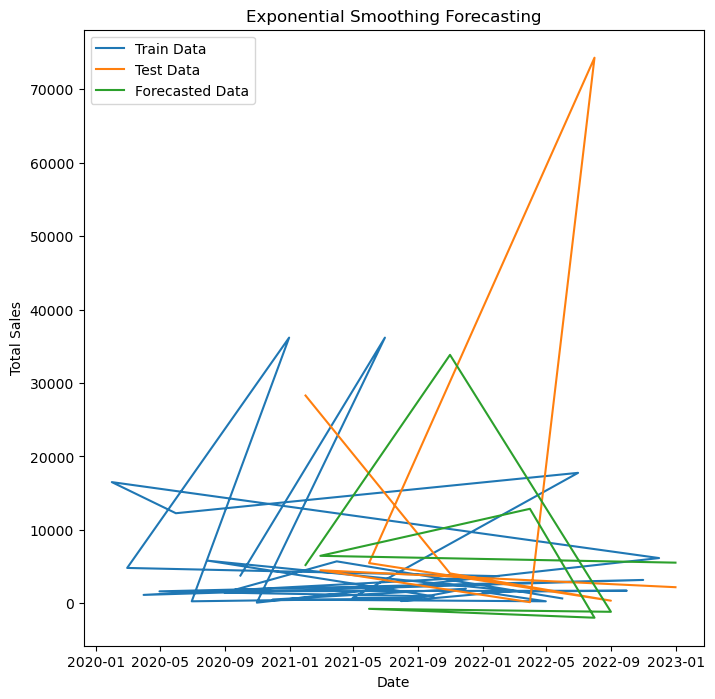

In [88]:
# Plotting actual vs forecasted values
plt.figure(figsize=(8, 8))
plt.plot(total_purchase_train.index, total_purchase_train.values, label='Train Data')
plt.plot(total_purchase_test.index, total_purchase_test.values, label='Test Data')
plt.plot(total_purchase_test.index, forecast_values, label='Forecasted Data')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()